# 1. 데이터 로드

In [1]:
import pandas as pd

df_cat = pd.read_csv('./archive/cookie_cats.csv', encoding = 'utf-8')

# 2. 데이터 전처리 및 EDA

### 2-1. 데이터 전처리
- 총 90,189개의 데이터
- null값 미존재
- 데이터 타입 총 3가지 종류 (int, bool, object)
- version에 따른, user의 retention1 or 7을 boolean 값으로 나타낸 데이터 셋

In [2]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [3]:
df_cat.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
df_cat.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


### 2-2. `sum_gamerounds` 이상치 제거
- 지나치게 `sum_gamerounds`가 높은 데이터 포인트 삭제 = 이상치로 판단
- 삭제 후 90,188개 데이터 (이상치 1건 drop)

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")

<Figure size 640x480 with 0 Axes>

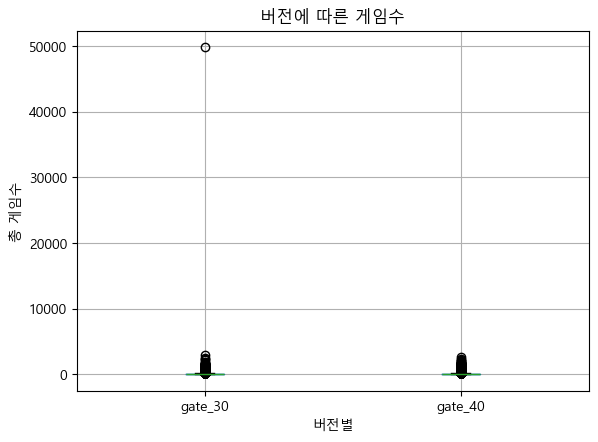

In [7]:
# 박스 플롯 생성
plt.figure()
df_cat.boxplot(column='sum_gamerounds', by='version')
plt.title('버전에 따른 게임수')
plt.suptitle('')  # 기본 제목 제거
plt.xlabel('버전별')
plt.ylabel('총 게임수')
plt.show()

In [8]:
df_cat.iloc[df_cat['sum_gamerounds'].sort_values(ascending=False).index]

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True
7912,871500,gate_30,2961,True,True
29417,3271615,gate_40,2640,True,False
43671,4832608,gate_30,2438,True,True
48188,5346171,gate_40,2294,True,True
...,...,...,...,...,...
59687,6610805,gate_30,0,False,False
23707,2639282,gate_40,0,False,False
59670,6608718,gate_30,0,False,False
59645,6604544,gate_30,0,False,False


In [9]:
df_cat = df_cat[df_cat['sum_gamerounds'] <= 10000]

In [10]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90188 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90188 non-null  int64 
 1   version         90188 non-null  object
 2   sum_gamerounds  90188 non-null  int64 
 3   retention_1     90188 non-null  bool  
 4   retention_7     90188 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.9+ MB


In [11]:
df_cat.describe()

,userid,sum_gamerounds
count,9.018800e+04,90188.000000
mean,4.998397e+06,51.320253
std,2.883298e+06,102.682719
min,1.160000e+02,0.000000
25%,2.512211e+06,5.000000
50%,4.995804e+06,16.000000
75%,7.496461e+06,51.000000
max,9.999861e+06,2961.000000


### 2-3. `sum_gamerounds` 0 값 삭제 (설치 후 게임 미진행)
- 게임을 전혀 경험하지 않은 User
- 연속적인 게임 진행을 막는 게이트(=허들)는 게임 흥미도와 직접적 관련이 있다고 판단
- 따라서 게이트 변경에 대한 User 리텐션 A/B test와 무관한 데이터라고 판단

In [12]:
df_cat.loc[df_cat['sum_gamerounds'].sort_values().index]

,userid,version,sum_gamerounds,retention_1,retention_7
46551,5159863,gate_40,0,False,False
79246,8773542,gate_30,0,False,False
50705,5620952,gate_40,0,False,False
59059,6538238,gate_40,0,False,False
4039,446820,gate_30,0,False,False
...,...,...,...,...,...
46344,5133952,gate_30,2251,True,True
48188,5346171,gate_40,2294,True,True
43671,4832608,gate_30,2438,True,True
29417,3271615,gate_40,2640,True,False


In [13]:
df_cat[df_cat['sum_gamerounds'] == 0].shape[0]

3994

In [14]:
df_cat = df_cat[df_cat['sum_gamerounds'] != 0]

In [15]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86194 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          86194 non-null  int64 
 1   version         86194 non-null  object
 2   sum_gamerounds  86194 non-null  int64 
 3   retention_1     86194 non-null  bool  
 4   retention_7     86194 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.8+ MB


In [16]:
df_cat.describe()

,userid,sum_gamerounds
count,8.619400e+04,86194.000000
mean,4.997568e+06,53.698297
std,2.883587e+06,104.425174
min,1.160000e+02,1.000000
25%,2.513062e+06,6.000000
50%,4.995739e+06,18.000000
75%,7.495053e+06,54.000000
max,9.999861e+06,2961.000000


### 2-4. `sum_gamerounds` 임계값 이하 `user_id` 삭제
- 삭제 대상 데이터
  - gate_30인 user 중 30 라운드까지 플레이하지 않은 user. (sum_gamerounds < 30)
  - gate_40인 user 중 40 라운드까지 플레이하지 않은 user. (sum_gamerounds < 40)
- 해당 분석의 목적은 user별 gate 차이에 따른 retention 영향.
- gate에 도달하지 않은 user는 해당 분석에 부합하지 않다고 판단.

In [17]:
df_cat_prepro = df_cat[((df_cat['version'] == 'gate_30') & (df_cat['sum_gamerounds'] >= 30)) |
                       ((df_cat['version'] == 'gate_40') & (df_cat['sum_gamerounds'] >= 40))]

In [18]:
df_cat_prepro[(df_cat_prepro['version'] == 'gate_30') & (df_cat_prepro['sum_gamerounds'] >= 30)].shape[0]

16655

In [19]:
df_cat_prepro[(df_cat_prepro['version'] == 'gate_40') & (df_cat_prepro['sum_gamerounds'] >= 40)].shape[0]

13827

In [20]:
df_cat_prepro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30482 entries, 1 to 90187
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          30482 non-null  int64 
 1   version         30482 non-null  object
 2   sum_gamerounds  30482 non-null  int64 
 3   retention_1     30482 non-null  bool  
 4   retention_7     30482 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 1012.1+ KB


In [21]:
df_cat_prepro.describe()

,userid,sum_gamerounds
count,3.048200e+04,30482.000000
mean,5.002470e+06,131.425792
std,2.875289e+06,146.048025
min,3.370000e+02,30.000000
25%,2.525442e+06,50.000000
50%,4.990006e+06,81.000000
75%,7.481872e+06,154.000000
max,9.999768e+06,2961.000000


# 3. 데이터 EDA
1. gate_30, 40에 따른 retention_1, 7의 독립성 판단
    - 카이제곱검정
    - 시각화를 통한 크로스체크

### 3-1. 데이터 EDA (통계검정)

#### 3-1-1. 카이 제곱 검정
1. version과 retention_1
   - $H_0 (귀무가설)$: version과 retention_1은 독립이다.
   - $H_1 (대립가설)$: version과 retention_1은 독립이 아니다.
   - 유의수준 0.05
3. version과 retention_7
   - $H_0 (귀무가설)$: version과 retention_7은 독립이다.
   - $H_1 (대립가설)$: version과 retention_7은 독립이 아니다.
   - 유의수준 0.05

In [22]:
from scipy.stats import chi2_contingency

# 교차표 생성 (버전과 리텐션 1일)
contingency_table_re1 = pd.crosstab(df_cat_prepro['version'], df_cat_prepro['retention_1'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table_re1)

# 결과 출력
print(f"카이제곱 통계량: {chi2:.5f}")
print(f"p-value: {p:.5f}")

# 유의수준 0.05와 비교하여 귀무가설 기각 여부 출력
if p < 0.05:
    print("p-value가 유의수준 0.05보다 작으므로, 귀무가설을 기각합니다. 두 변수는 종속적입니다.")
else:
    print("p-value가 유의수준 0.05보다 크므로, 귀무가설을 기각할 수 없습니다. 두 변수는 독립적입니다.")

카이제곱 통계량: 42.30024
p-value: 0.00000
p-value가 유의수준 0.05보다 작으므로, 귀무가설을 기각합니다. 두 변수는 종속적입니다.


In [23]:
contingency_table_re1

retention_1,False,True
version,,
gate_30,3314,13341
gate_40,2348,11479


In [32]:
# 교차표 생성 (버전과 리텐션 7일)
contingency_table_re7 = pd.crosstab(df_cat_prepro['version'], df_cat_prepro['retention_7'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table_re7)

# 결과 출력
print(f"카이제곱 통계량: {chi2:.5f}")
print(f"p-value: {p:.5f}")

# 유의수준 0.05와 비교하여 귀무가설 기각 여부 출력
if p < 0.05:
    print("p-value가 유의수준 0.05보다 작으므로, 귀무가설을 기각합니다. 두 변수는 종속적입니다.")
else:
    print("p-value가 유의수준 0.05보다 크므로, 귀무가설을 기각할 수 없습니다. 두 변수는 독립적입니다.")

카이제곱 통계량: 65.12574
p-value: 0.00000
p-value가 유의수준 0.05보다 작으므로, 귀무가설을 기각합니다. 두 변수는 종속적입니다.


In [149]:
contingency_table_re7

retention_7,False,True
version,,
gate_30,9348,7307
gate_40,7120,6707


### 3-2. 데이터 EDA (시각화)
1. gate에 따른 retention 비율

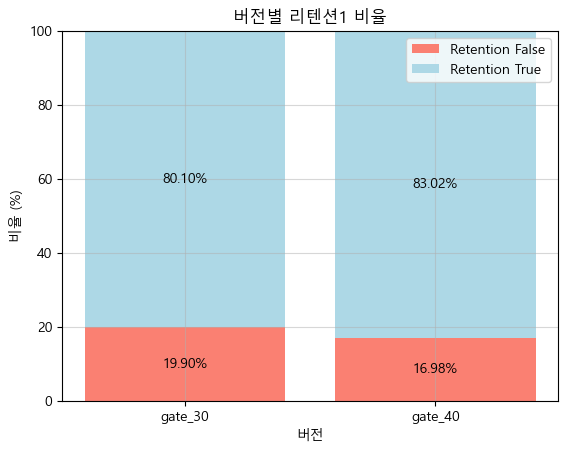

In [45]:
# 데이터 예시 (contingency_table_re1을 사용)
data = {
    'version': ['gate_30', 'gate_40'],
    'False': [3314, 2348],  # 리텐션 False 값
    'True': [13341, 11479]  # 리텐션 True 값
}
df = pd.DataFrame(data)

# 비율 계산
df['Total'] = df['False'] + df['True']
df['False (%)'] = (df['False'] / df['Total']) * 100
df['True (%)'] = (df['True'] / df['Total']) * 100

# 스택형 바 차트 생성
fig, ax = plt.subplots()
bar1 = ax.bar(df['version'], df['False (%)'], label='Retention False', color='salmon')
bar2 = ax.bar(df['version'], df['True (%)'], bottom=df['False (%)'], label='Retention True', color='lightblue')

# 비율 표시
for i, (f, t) in enumerate(zip(df['False (%)'], df['True (%)'])):
    ax.text(i, f / 2, f'{f:.2f}%', ha='center', va='center')
    ax.text(i, f + t / 2, f'{t:.2f}%', ha='center', va='center')

# 그래프 꾸미기
ax.set_title('버전별 리텐션1 비율')
ax.set_ylabel('비율 (%)')
ax.set_xlabel('버전')
ax.set_ylim(0, 100)
ax.legend(loc='upper right')
plt.grid(True, alpha=0.5)

# 그래프 출력
plt.show()

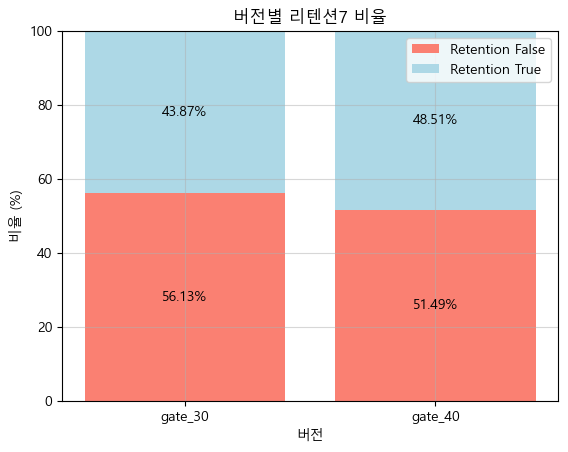

In [44]:
# 데이터 예시 (contingency_table_re7을 사용)
data = {
    'version': ['gate_30', 'gate_40'],
    'False': [9348, 7120],  # 리텐션 False 값
    'True': [7307, 6707]  # 리텐션 True 값
}
df = pd.DataFrame(data)

# 비율 계산
df['Total'] = df['False'] + df['True']
df['False (%)'] = (df['False'] / df['Total']) * 100
df['True (%)'] = (df['True'] / df['Total']) * 100

# 스택형 바 차트 생성
fig, ax = plt.subplots()
bar1 = ax.bar(df['version'], df['False (%)'], label='Retention False', color='salmon')
bar2 = ax.bar(df['version'], df['True (%)'], bottom=df['False (%)'], label='Retention True', color='lightblue')

# 비율 표시
for i, (f, t) in enumerate(zip(df['False (%)'], df['True (%)'])):
    ax.text(i, f / 2, f'{f:.2f}%', ha='center', va='center')
    ax.text(i, f + t / 2, f'{t:.2f}%', ha='center', va='center')

# 그래프 꾸미기
ax.set_title('버전별 리텐션7 비율')
ax.set_ylabel('비율 (%)')
ax.set_xlabel('버전')
ax.set_ylim(0, 100)
ax.legend(loc='upper right')
plt.grid(True, alpha=0.5)

# 그래프 출력
plt.show()

### 3-3. gata별 / retention별 User 현황
- 1일 T, 7일 T: 제일 많은 게임 라운드를 진행할 것으로 예상.
- 1일 T, 7일 F: 어떤 유저가 더 많은 게임 라운드를 진행했을까? 게이트별 영향이 있을까?
- 1일 F, 7일 T: 어떤 유저가 더 많은 게임 라운드를 진행했을까? 게이트별 영향이 있을까?
- 1일 F, 7일 F: 제일 적은 게임 라운드를 진행할 것으로 예상. 대부분 당일 설치 후 미진행 유저가 아닐까?

In [35]:
# gate_30인 유저 필터링
gate_30_users = df_cat[df_cat['version'] == 'gate_30']

# gate_40인 유저 필터링
gate_40_users = df_cat[df_cat['version'] == 'gate_40']

# 4개 범주에 해당하는 인원수 계산 (gate_30)
count_1F_7F_30 = gate_30_users[(gate_30_users['retention_1'] == False) & (gate_30_users['retention_7'] == False)].shape[0]
count_1F_7T_30 = gate_30_users[(gate_30_users['retention_1'] == False) & (gate_30_users['retention_7'] == True)].shape[0]
count_1T_7F_30 = gate_30_users[(gate_30_users['retention_1'] == True) & (gate_30_users['retention_7'] == False)].shape[0]
count_1T_7T_30 = gate_30_users[(gate_30_users['retention_1'] == True) & (gate_30_users['retention_7'] == True)].shape[0]

# 4개 범주에 해당하는 인원수 계산 (gate_40)
count_1F_7F_40 = gate_40_users[(gate_40_users['retention_1'] == False) & (gate_40_users['retention_7'] == False)].shape[0]
count_1F_7T_40 = gate_40_users[(gate_40_users['retention_1'] == False) & (gate_40_users['retention_7'] == True)].shape[0]
count_1T_7F_40 = gate_40_users[(gate_40_users['retention_1'] == True) & (gate_40_users['retention_7'] == False)].shape[0]
count_1T_7T_40 = gate_40_users[(gate_40_users['retention_1'] == True) & (gate_40_users['retention_7'] == True)].shape[0]

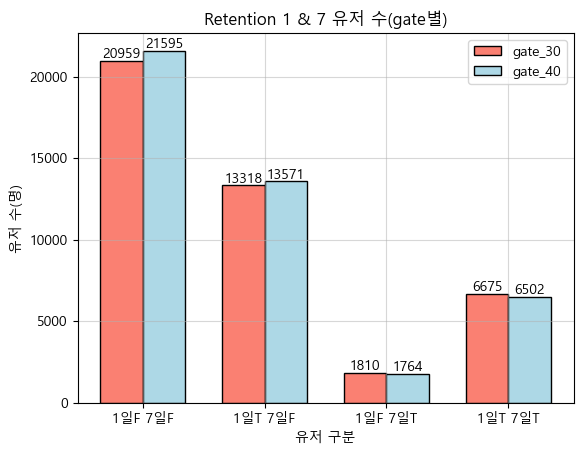

In [68]:
# 바 그래프 데이터
categories = ['1일F 7일F', '1일T 7일F', '1일F 7일T', '1일T 7일T']
counts_30 = [count_1F_7F_30, count_1T_7F_30, count_1F_7T_30, count_1T_7T_30]
counts_40 = [count_1F_7F_40, count_1T_7F_40, count_1F_7T_40, count_1T_7T_40]

# 바 그래프 설정
bar_width = 0.35
index = np.arange(len(categories))

fig, ax = plt.subplots()

# 바 그래프 그리기
bars_30 = ax.bar(index, counts_30, bar_width, label='gate_30', edgecolor='black', color='salmon')
bars_40 = ax.bar(index + bar_width, counts_40, bar_width, label='gate_40',edgecolor='black', color='lightblue')

# 바 위에 인원수 출력 (gate_30)
for bar in bars_30:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# 바 위에 인원수 출력 (gate_40)
for bar in bars_40:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# 축 레이블 및 제목 설정
ax.set_xlabel('유저 구분')
ax.set_ylabel('유저 수(명)')
ax.set_title('Retention 1 & 7 유저 수(gate별)')
plt.grid(True, alpha=0.5)

# x축 눈금 설정
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories, fontsize=10)

# 레전드 추가
ax.legend()

# 그래프 출력
plt.show()

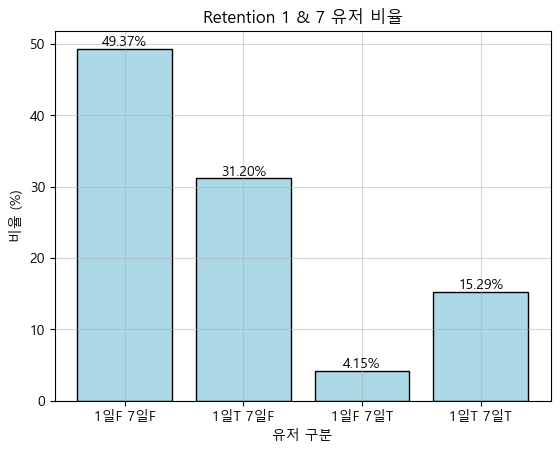

In [66]:
# 4개 그룹에 속하는 유저 수 계산
count_1F_7F = df_cat[(df_cat['retention_1'] == False) & (df_cat['retention_7'] == False)].shape[0]
count_1F_7T = df_cat[(df_cat['retention_1'] == False) & (df_cat['retention_7'] == True)].shape[0]
count_1T_7F = df_cat[(df_cat['retention_1'] == True) & (df_cat['retention_7'] == False)].shape[0]
count_1T_7T = df_cat[(df_cat['retention_1'] == True) & (df_cat['retention_7'] == True)].shape[0]

# 전체 유저 수 계산
total_users = df_cat.shape[0]

# 비율 계산
ratio_1F_7F = count_1F_7F / total_users * 100
ratio_1F_7T = count_1F_7T / total_users * 100
ratio_1T_7F = count_1T_7F / total_users * 100
ratio_1T_7T = count_1T_7T / total_users * 100

# 바 그래프 데이터
categories = ['1일F 7일F', '1일T 7일F', '1일F 7일T', '1일T 7일T']
ratios = [ratio_1F_7F, ratio_1T_7F, ratio_1F_7T, ratio_1T_7T]

# 바 그래프 그리기
colors = ['lightblue']
bars = plt.bar(categories, ratios, edgecolor='black', color=colors)

# 바 위에 비율 출력
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# 축 레이블 및 제목 설정
plt.xlabel('유저 구분')
plt.ylabel('비율 (%)')
plt.title('Retention 1 & 7 유저 비율')
plt.grid(True, alpha=0.5)

# 그래프 출력
plt.show()

### 3-4. 당일~1일 내 이탈 유저 게임 라운드 수(7일 not 리텐션 유저)
- 게이트 변경 A/B 테스트를 위해서는 유저 이탈-라운드 수 간의 관계성 파악 필요하다고 판단
- 약 80%에 해당하는 설치 초반 이탈 유저 행동 분석을 통한 원인 파악 목적
  - 아래 2개 그룹(당일~1일)을 대상으로 시각화
  - 1일 not 리텐션 & 7일 not 리텐션 유저(= 당일 플레이 후 이탈 유저)
  - 1일 리텐션 & 7일 not 리텐션 유저

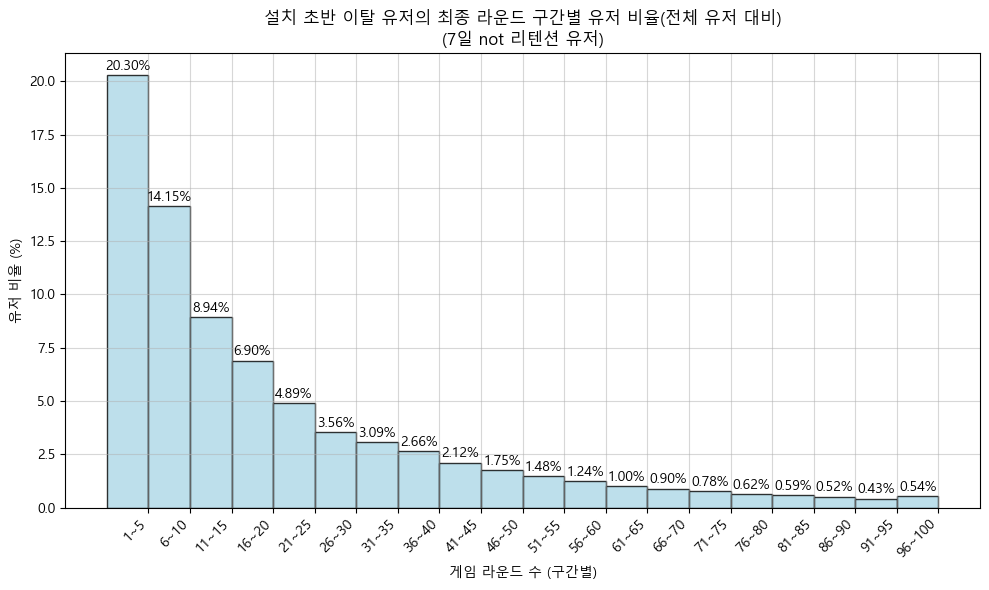

In [103]:
# 조건에 맞는 유저 필터링 및 합치기
filtered_users = df_cat[
    ((df_cat['retention_1'] == True) & (df_cat['retention_7'] == False)) |
    ((df_cat['retention_1'] == False) & (df_cat['retention_7'] == False))
]
game_rounds = filtered_users['sum_gamerounds']

# 전체 유저 수
total_users = df_cat['userid'].nunique()  # 전체 유저 수 (userid 기준 고유 값)

# 히스토그램 생성
plt.figure(figsize=(10, 6))
bins = np.arange(0, 101, 5)  # x축을 5 단위로 설정, 최대값 100
counts, bin_edges = np.histogram(game_rounds, bins=bins)
ratios = counts / total_users * 100  # 전체 유저 수 대비 비율 계산

# 히스토그램 그리기 (y축 비율)
bars = plt.bar(bin_edges[:-1], ratios, width=5, color='lightblue', edgecolor='black', alpha=0.8)

# 축 레이블 및 제목 설정
plt.xlabel('게임 라운드 수 (구간별)')
plt.ylabel('유저 비율 (%)')
plt.title('설치 초반 이탈 유저의 최종 라운드 구간별 유저 비율(전체 유저 대비)\n(7일 not 리텐션 유저)')

# x축 레이블
xtick_labels = [f'{int(bin_edges[i] + 1)}~{int(bin_edges[i + 1])}' for i in range(len(bin_edges) - 1)]
plt.xticks(bin_edges[:-1] + 2.5, xtick_labels, rotation=45, ha='right')

# 각 bar 객체의 위치와 너비를 사용하여 텍스트 중앙 정렬
for bar, ratio in zip(bars, ratios):
    plt.text(bar.get_x() + bar.get_width() / 2, ratio + 0.1,  # 막대 중앙과 약간 위로 위치
             f'{ratio:.2f}%', ha='center', va='bottom')

# 그리드 추가
plt.grid(True, alpha=0.5)

# 그래프 출력
plt.tight_layout()
plt.show()

In [3]:
# 1 ~ 15 라운드까지만 플레이한 유저 비율
20.30+14.15+8.94

43.39

In [5]:
# 1 ~ 30 라운드까지만 플레이한 유저 비율 (첫번째 gate 직전)
20.30+14.15+8.94+6.90+4.89+3.56

58.74

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12708\2814552999.py:45: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\lucky\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


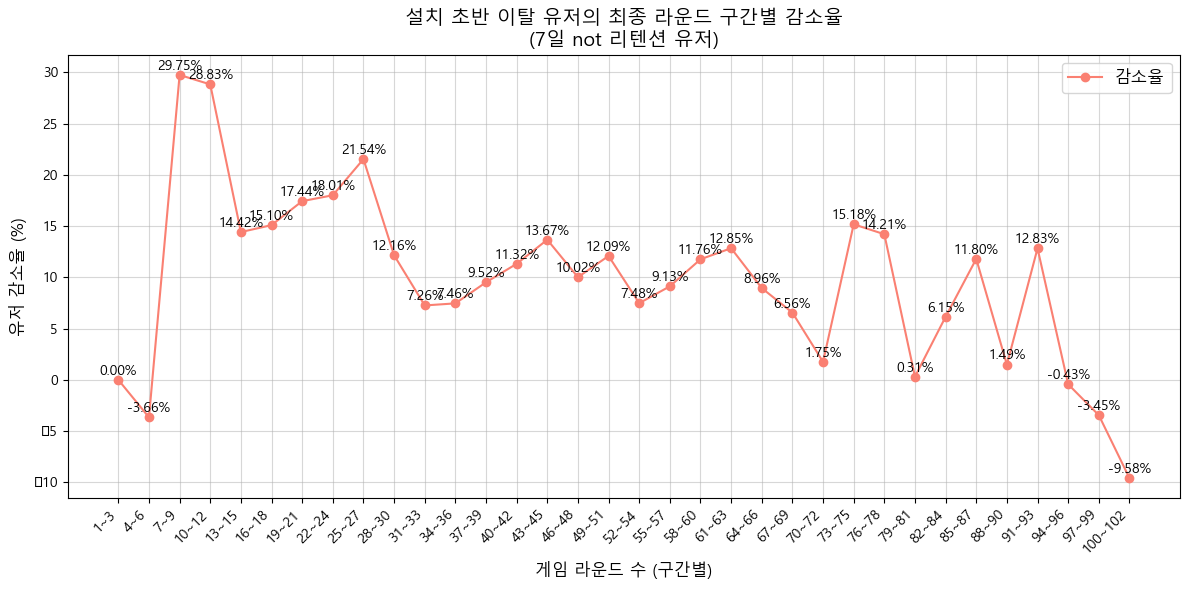

In [102]:
# 조건에 맞는 유저 필터링 및 합치기
filtered_users = df_cat[
    ((df_cat['retention_1'] == True) & (df_cat['retention_7'] == False)) |
    ((df_cat['retention_1'] == False) & (df_cat['retention_7'] == False))
]
game_rounds = filtered_users['sum_gamerounds']

# 히스토그램 구간 설정 (구간 크기: 3, 최대값: 102)
bins = np.arange(0, 103, 3)  # x축을 3 단위로 설정, 최대값 102
counts, bin_edges = np.histogram(game_rounds, bins=bins)

# 감소율 계산 (전 구간 대비 감소)
decrease_rates = [0]  # 첫 구간은 감소율 계산 불가, 0으로 설정
for i in range(1, len(counts)):
    if counts[i - 1] > 0:  # 이전 구간 유저 수가 0이 아닌 경우만 감소율 계산
        decrease_rate = ((counts[i - 1] - counts[i]) / counts[i - 1]) * 100
    else:
        decrease_rate = 0  # 이전 구간이 0일 경우 감소율을 0으로 설정
    decrease_rates.append(decrease_rate)

# x축 레이블 생성
xtick_labels = [f'{int(bin_edges[i] + 1)}~{int(bin_edges[i + 1])}' for i in range(len(bin_edges) - 1)]

# 선 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(bin_edges[:-1] + 1.5, decrease_rates, marker='o', linestyle='-', color='salmon', label='감소율')

# 각 점 위에 감소율 표시
for x, y in zip(bin_edges[:-1] + 1.5, decrease_rates):
    plt.text(x, y + 0.5, f'{y:.2f}%', ha='center', fontsize=10)

# 축 레이블 및 제목 설정
plt.xlabel('게임 라운드 수 (구간별)', fontsize=12)
plt.ylabel('유저 감소율 (%)', fontsize=12)
plt.title('설치 초반 이탈 유저의 최종 라운드 구간별 감소율\n(7일 not 리텐션 유저)', fontsize=14)

# x축 눈금 설정
plt.xticks(bin_edges[:-1] + 1.5, xtick_labels, rotation=45, ha='right')

# 그리드 및 범례 추가
plt.grid(True, alpha=0.5)
plt.legend(fontsize=12)

# 그래프 출력
plt.tight_layout()
plt.show()

- 당일~1일까지만 플레이한 유저의 게임 라운드 수 분석
- 전체 유저 대비 해당 그룹의 약 43%가 15 라운드까지만 플레이하고 이탈
- 첫번째 gate 직전 이탈한 유저는 약 58%

### 3-5. 당일만 플레이한 그룹의 최종 게임 라운드 수 및 인원 비율
- 리텐션 기준, 유저 그룹별로 차별화된 전략 고안을 위한 분석

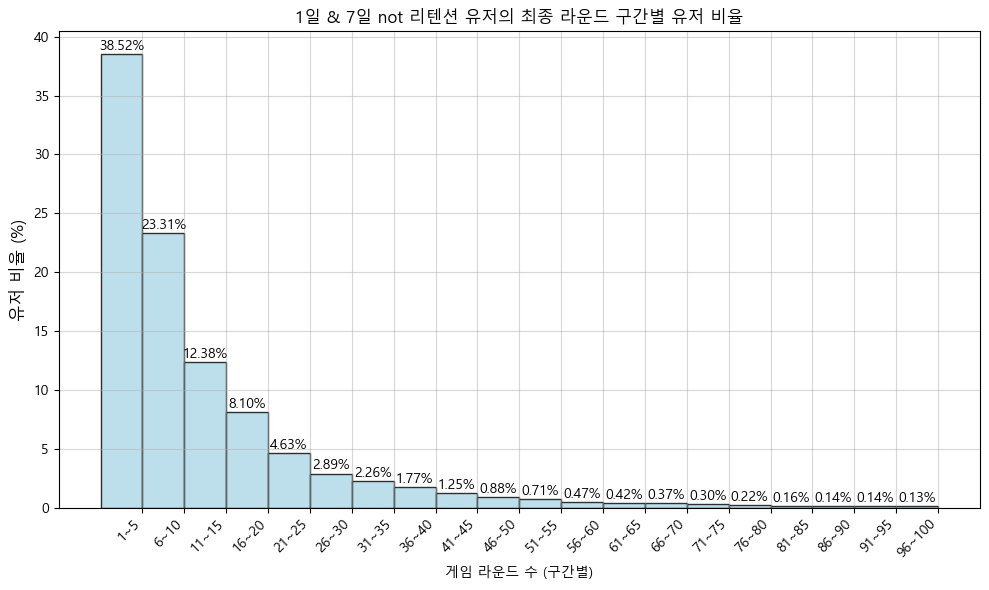

In [101]:
# 조건에 맞는 유저 필터링 (1일 & 7일 NOT Retention)
filtered_users_1F_7F = df_cat[(df_cat['retention_1'] == False) & (df_cat['retention_7'] == False)]
game_rounds = filtered_users_1F_7F['sum_gamerounds']

# 해당 조건에 맞는 전체 유저 수
filtered_total_users = filtered_users_1F_7F['userid'].nunique()  # 조건에 해당하는 전체 유저 수

# 히스토그램 생성
plt.figure(figsize=(10, 6))
bins = np.arange(0, 101, 5)  # x축을 5 단위로 설정, 최대값 100
counts, bin_edges = np.histogram(game_rounds, bins=bins)
ratios = counts / filtered_total_users * 100  # 조건 유저 수 대비 비율 계산

# 히스토그램 그리기 (y축 비율)
bars = plt.bar(bin_edges[:-1], ratios, width=5, color='lightblue', edgecolor='black', alpha=0.8)

# 축 레이블 및 제목 설정
plt.xlabel('게임 라운드 수 (구간별)')
plt.ylabel('유저 비율 (%)', fontsize=12)
plt.title('1일 & 7일 not 리텐션 유저의 최종 라운드 구간별 유저 비율')

# x축 레이블
xtick_labels = [f'{int(bin_edges[i] + 1)}~{int(bin_edges[i + 1])}' for i in range(len(bin_edges) - 1)]
plt.xticks(bin_edges[:-1] + 2.5, xtick_labels, rotation=45, ha='right')

# 각 bar 객체의 위치와 너비를 사용하여 텍스트 중앙 정렬
for bar, ratio in zip(bars, ratios):
    plt.text(bar.get_x() + bar.get_width() / 2, ratio + 0.1,  # 막대 중앙과 약간 위로 위치
             f'{ratio:.2f}%', ha='center', va='bottom')

# 그리드 추가
plt.grid(True, alpha=0.5)

# 그래프 출력
plt.tight_layout()
plt.show()

In [96]:
# 게임 라운드 1~30까지 유저 비율 합계 계산
38.52+23.31+12.38+8.10+4.63+2.89

89.82999999999998

- 당일에만 게임하고 이탈한 유저들의 최종 라운드 확인
- 약 90%의 유저가 <b>최초 게이트 30</b>을 만나기 전에 이탈
- <b>유저 리텐션은 게이트의 문제가 아닌, 게임 초반 FTUE(최초 사용자 경험) 개선이 필요한 것으로 추론</b>

### 3-6. 리텐션한 날짜 차이에 따른 최종 게임 라운드 수
- 특정 세그먼트 대상의 전략 고안을 위한 분석

In [99]:
filtered_users_1F_7T.describe()

,userid,sum_gamerounds
count,3.574000e+03,3574.000000
mean,4.996675e+06,74.698377
std,2.909161e+06,93.952693
min,1.842000e+03,1.000000
25%,2.432502e+06,19.000000
50%,4.984808e+06,45.000000
75%,7.475925e+06,95.000000
max,9.996935e+06,1241.000000


In [100]:
filtered_users_1T_7F.describe()

,userid,sum_gamerounds
count,2.688900e+04,26889.000000
mean,4.997114e+06,50.013612
std,2.879887e+06,59.580751
min,3.370000e+02,1.000000
25%,2.507794e+06,16.000000
50%,4.991564e+06,33.000000
75%,7.499961e+06,61.000000
max,9.999768e+06,2640.000000


- <b>1그룹(1일 not 리텐션 & 7일 리텐션 유저)</b> VS 2그룹(1일 리텐션 & 7일 not 리텐션 유저)
- 두 그룹의 게임 라운드 수 비교
- 2그룹이 유저 숫자는 1그룹 유저 대비 약 9배 많지만, 게임 수는 2그룹 유저가 적음
- 1~3사분위수에서 모두 <b>1그룹 유저</b>가 높은 게임 수 보임
- <b>해당 세그먼트를 대상으로한 전략 필요</b>

### 3-7. 유저 그룹별 숫자 비교

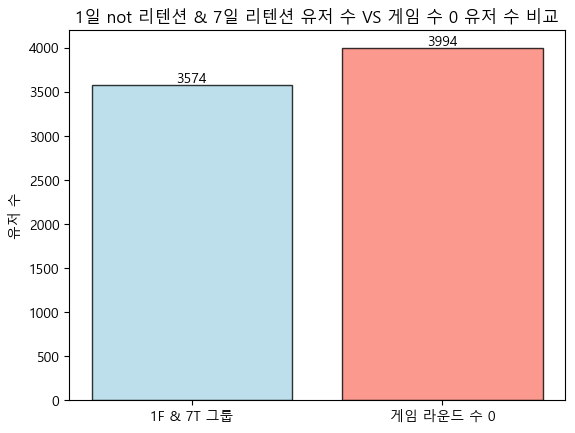

In [116]:
# 게임 라운드 수가 0인 유저 재추출
df_cat_0 = pd.read_csv('./archive/cookie_cats.csv', encoding = 'utf-8')
df_cat_0 = df_cat_0[df_cat_0['sum_gamerounds'] == 0]

# 그룹 1: count_1F_7T 그룹 유저 수
count_1F_7T = df_cat[(df_cat['retention_1'] == False) & (df_cat['retention_7'] == True)].shape[0]

# 그룹 2: 게임 라운드 수가 0인 유저 수
count_game_rounds_0 = df_cat_0.shape[0]

# 데이터 준비
labels = ['1F & 7T 그룹', '게임 라운드 수 0']
counts = [count_1F_7T, count_game_rounds_0]

# 그래프 생성
plt.figure()
bars = plt.bar(labels, counts, color=['lightblue', 'salmon'], edgecolor='black', alpha=0.8)

# 각 바 위에 값 표시
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{count}', ha='center', va='bottom')

# 축 및 제목 설정
plt.ylabel('유저 수')
plt.title('1일 not 리텐션 & 7일 리텐션 유저 수 VS 게임 수 0 유저 수 비교')

# 그래프 출력
plt.show()

- 설치만하고 게임을 전혀 플레이하지 않은 유저와 1F & 7T 그룹의 인원수 차이 비교
- MAU 지표가 보다 중요하다면, 비용 조정을 통한 1F & 7T 그룹의 리텐션 개선에 활용